In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/dell/Downloads/R.csv")






In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#Task: Top Cuisines

#Determine the top Five most
common cuisines in the dataset.

In [6]:
top_cuisines = (
    df['Cuisines']
    .dropna()                
    .str.split(',')       
    .explode()               
    .str.strip()           
    .value_counts()        
    .head(5)                
)
print("Top 3 Cuisines:")
print(top_cuisines)

Top 3 Cuisines:
Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Name: count, dtype: int64


#Calculate the percentage of restaurants that serve each of the topcuisines.

In [7]:
top_cuisines = (
    df['Cuisines']
    .dropna()
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(5)
)
total_restaurants = len(df)
top_cuisines_percentage = (top_cuisines / total_restaurants) * 100

print("Top Cuisines Percentage:")
print(top_cuisines_percentage)

Top Cuisines Percentage:
Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Mughlai         10.417757
Italian          7.999162
Name: count, dtype: float64


#Task: City Analysis

##Identify the city with the highest number of restaurants in the dataset.

In [8]:
top_city = df['City'].value_counts().head(5)

print("City with the highest number of restaurants:")
print(top_city)

City with the highest number of restaurants:
City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64


##Calculate the average rating for restaurants in each city.


In [9]:
avg_rating_per_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

print("Average rating for restaurants in each city:")
print(avg_rating_per_city)

Average rating for restaurants in each city:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


In [33]:
# Determine the city with the highest average rating.


In [10]:

avg_rating_per_city = df.groupby('City')['Aggregate rating'].mean()


top_avg_rating_city = avg_rating_per_city.idxmax()
top_avg_rating_value = avg_rating_per_city.max()

print(f"City with the highest average rating: {top_avg_rating_city} ({top_avg_rating_value:.2f})")


City with the highest average rating: Inner City (4.90)


In [11]:
df["Aggregate rating"] = pd.to_numeric(df["Aggregate rating"], errors="coerce")
df = df.dropna(subset=["Aggregate rating"])
avg_by_city = df.groupby("City")["Aggregate rating"].mean().round(2)
max_avg = avg_by_city.max()
top_cities = avg_by_city[avg_by_city == max_avg].sort_index()
print("City/Cities with highest average rating:")
for city, rating in top_cities.items():
    print(f"{city}: {rating}")

City/Cities with highest average rating:
Inner City: 4.9


#task3

#Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

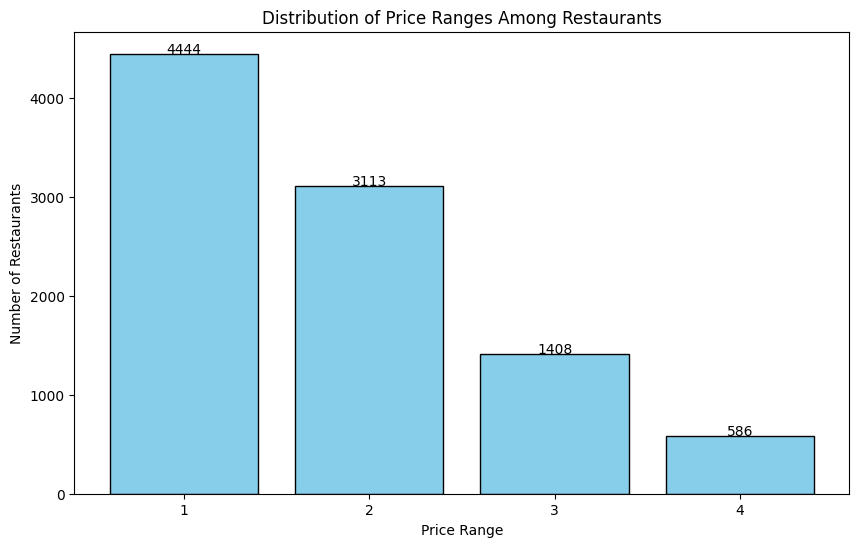

In [20]:
price_counts = df["Price range"].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.bar(price_counts.index.astype(str), price_counts.values, color="skyblue", edgecolor="black")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Price Ranges Among Restaurants")


for i, val in enumerate(price_counts.values):
    plt.text(i, val + 5, str(val), ha='center')

plt.show()

#Calculate the percentage of restaurants in each price range category.


In [22]:
price_percentage = (df["Price range"].value_counts(normalize=True) * 100).round(2)


price_percentage_df = price_percentage.reset_index()
price_percentage_df.columns = ["Price Range", "Percentage"]

print(price_percentage_df)


   Price Range  Percentage
0            1       46.53
1            2       32.59
2            3       14.74
3            4        6.14


##Task: Online Delivery


#Determine the percentage of restaurants that offer online delivery.

In [23]:

online_delivery_percentage = (df["Has Online delivery"].str.strip().value_counts(normalize=True) * 100).round(2)

print("Percentage of restaurants offering online delivery:")
print(online_delivery_percentage)

Percentage of restaurants offering online delivery:
Has Online delivery
No     74.34
Yes    25.66
Name: proportion, dtype: float64


#Compare the average ratings of restaurants with and without online delivery.


In [24]:
df["Aggregate rating"] = pd.to_numeric(df["Aggregate rating"], errors="coerce")
# Compare average ratings based on online delivery availability
avg_rating_comparison = df.groupby("Has Online delivery")["Aggregate rating"].mean().round(2)

print("Average ratings of restaurants with/without online delivery:")
print(avg_rating_comparison)

Average ratings of restaurants with/without online delivery:
Has Online delivery
No     2.47
Yes    3.25
Name: Aggregate rating, dtype: float64


##Task: Restaurant Ratings


#Analyze the distribution of aggregate ratings and determine the most common rating range.

Distribution of Aggregate Ratings:
Rating Range
0-1    2148
1-2      10
2-3    1891
3-4    4388
4-5    1114
Name: count, dtype: int64

Most common rating range: 3-4


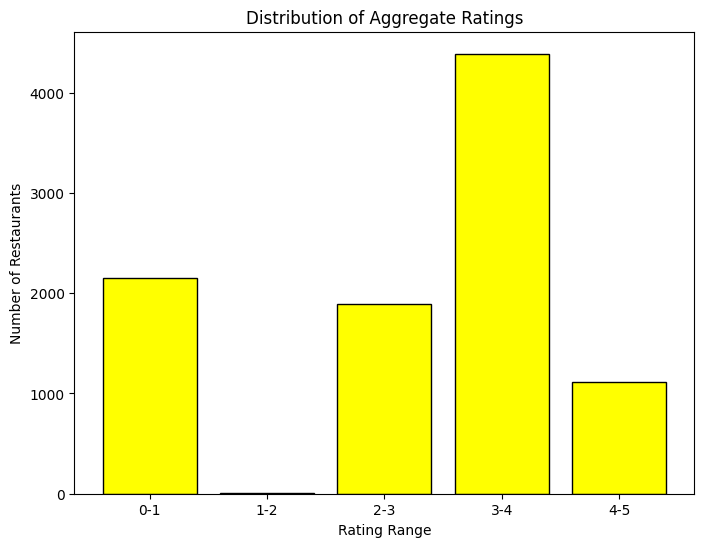

In [28]:

df["Aggregate rating"] = pd.to_numeric(df["Aggregate rating"], errors="coerce")
bins = [0, 1, 2, 3, 4, 5]
labels = ["0-1", "1-2", "2-3", "3-4", "4-5"]
df["Rating Range"] = pd.cut(df["Aggregate rating"], bins=bins, labels=labels, include_lowest=True)
rating_distribution = df["Rating Range"].value_counts().sort_index()
most_common_range = rating_distribution.idxmax()
print("Distribution of Aggregate Ratings:")
print(rating_distribution)
print("\nMost common rating range:", most_common_range)
plt.figure(figsize=(8,6))
plt.bar(rating_distribution.index.astype(str), rating_distribution.values, color="yellow", edgecolor="black")
plt.xlabel("Rating Range")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Aggregate Ratings")
plt.show()


#Calculate the average number of votes received by restaurants.


In [40]:
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce")

avg_votes = df["Votes"].mean().round(2)

print("Average number of votes received by restaurants:", avg_votes)

Average number of votes received by restaurants: 156.91


##Task: Cuisine Combination


#Identify the most common combinations of cuisines in the dataset.

In [42]:
df["Cuisines"] = df["Cuisines"].astype(str).str.strip()


common_cuisines = df["Cuisines"].value_counts().head(10)

print("Most common cuisine combinations:")
print(common_cuisines)

Most common cuisine combinations:
Cuisines
North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


#Determine if certain cuisine combinations tend to have higher ratings.

In [48]:
df["Aggregate rating"] = pd.to_numeric(df["Aggregate rating"], errors="coerce")

# Clean Cuisines column (remove extra spaces)
df["Cuisines"] = df["Cuisines"].astype(str).str.strip()

# Group by cuisine combinations and calculate average rating
cuisine_rating = (
    df.groupby("Cuisines")["Aggregate rating"]
    .mean()
    .round(3)
    .sort_values(ascending=False)
)
print("Cuisine combinations with highest average ratings:")
print(cuisine_rating.head(30))

Cuisine combinations with highest average ratings:
Cuisines
Italian, Deli                            4.900
American, Coffee and Tea                 4.900
American, BBQ, Sandwich                  4.900
BBQ, Breakfast, Southern                 4.900
Italian, Bakery, Continental             4.900
American, Burger, Grill                  4.900
Hawaiian, Seafood                        4.900
Mexican, American, Healthy Food          4.900
American, Caribbean, Seafood             4.900
Mughlai, Lucknowi                        4.900
European, Contemporary                   4.900
European, German                         4.900
American, Sandwich, Tea                  4.900
European, Asian, Indian                  4.900
Burger, Bar Food, Steak                  4.900
World Cuisine                            4.900
Sunda, Indonesian                        4.900
Continental, Indian                      4.900
Filipino, Mexican                        4.850
Contemporary, Italian                    4.800


#Task: Geographic Analysis

#Plot the locations of restaurants on a map using longitude and latitude coordinates.

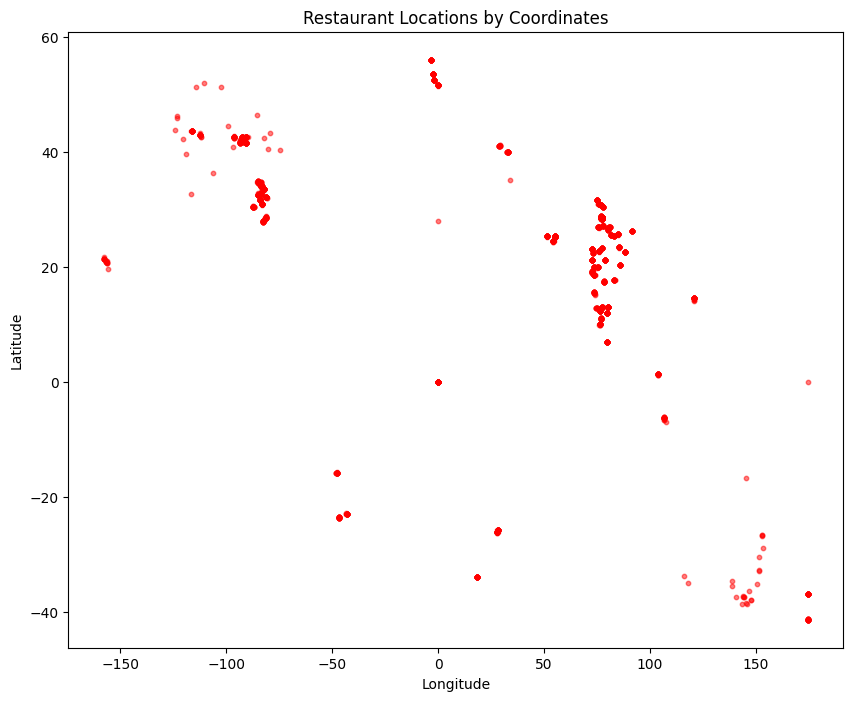

In [50]:
longitudes = pd.to_numeric(df["Longitude"], errors="coerce")
latitudes = pd.to_numeric(df["Latitude"], errors="coerce")

# Scatter plot of restaurant locations
plt.figure(figsize=(10, 8))
plt.scatter(longitudes, latitudes, alpha=0.5, s=10, c="red")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Restaurant Locations by Coordinates")
plt.show()

#Identify any patterns or clusters of restaurants in specific areas.

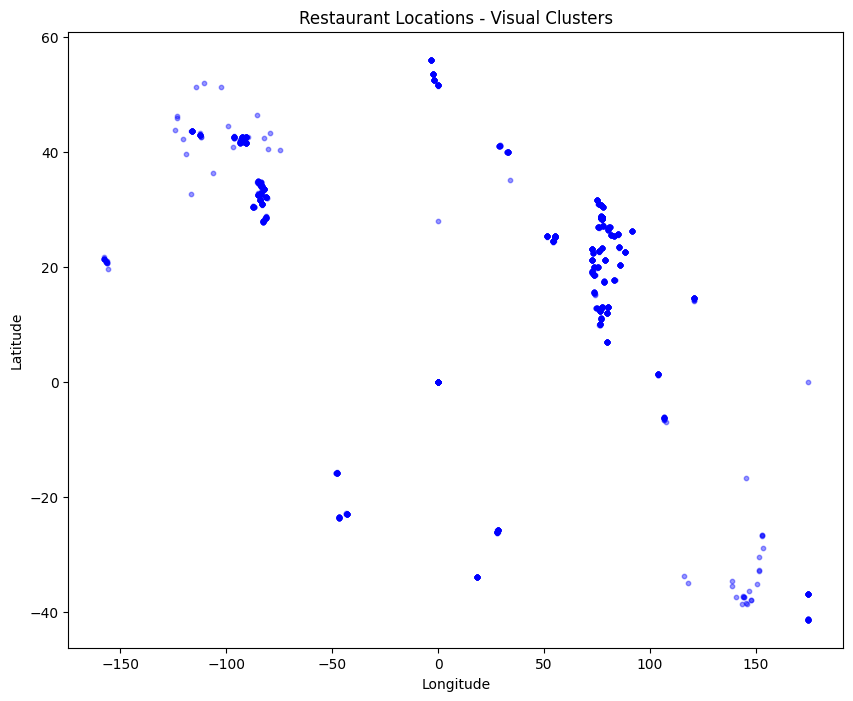

In [56]:
longitudes = pd.to_numeric(df["Longitude"], errors="coerce")
latitudes = pd.to_numeric(df["Latitude"], errors="coerce")

# Scatter plot
plt.figure(figsize=(10,8))
plt.scatter(longitudes, latitudes, alpha=0.4, s=10, c="blue")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Restaurant Locations - Visual Clusters")
plt.show()


#Task: Restaurant Chains

#Identify if there are any restaurant chains present in the dataset.

In [61]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 215.0 kB/s eta 0:00:40
   -- ------------------------------------- 0.5/8.9 MB 215.0 kB/s eta 0:00:40
   --- ------------------------------------ 0.8/8.9 MB 325.8 kB/s eta 0:00:25
   --- ------------------------------------ 0.8/8.9 MB 325.8 kB/s eta 0:00:2

In [65]:
restaurant_counts = df["Restaurant Name"].value_counts()

# Filter restaurants that appear more than once (chains)
chains = restaurant_counts[restaurant_counts > 1]

print("Potential restaurant chains in the dataset:")
print(chains.head(20)) 

Potential restaurant chains in the dataset:
Restaurant Name
Cafe Coffee Day        83
Domino's Pizza         79
Subway                 63
Green Chick Chop       51
McDonald's             48
Keventers              34
Pizza Hut              30
Giani                  29
Baskin Robbins         28
Barbeque Nation        26
Dunkin' Donuts         22
Barista                22
Giani's                22
Pind Balluchi          20
Costa Coffee           20
Wah Ji Wah             19
Pizza Hut Delivery     19
Sagar Ratna            19
Twenty Four Seven      19
Republic of Chicken    18
Name: count, dtype: int64


In [66]:

df["Aggregate rating"] = pd.to_numeric(df["Aggregate rating"], errors="coerce")
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce")
restaurant_counts = df["Restaurant Name"].value_counts()
chains = restaurant_counts[restaurant_counts > 1].index
chain_analysis = (
    df[df["Restaurant Name"].isin(chains)]
    .groupby("Restaurant Name")
    .agg(
        Outlets=("Restaurant Name", "count"),
        Avg_Rating=("Aggregate rating", "mean"),
        Total_Votes=("Votes", "sum"),
        Avg_Votes=("Votes", "mean")
    )
    .sort_values(by="Avg_Rating", ascending=False)
    .round(2)
)

print("Analysis of Restaurant Chains (Top 15 by Avg Rating):")
print(chain_analysis.head(15))


Analysis of Restaurant Chains (Top 15 by Avg Rating):
                           Outlets  Avg_Rating  Total_Votes  Avg_Votes
Restaurant Name                                                       
Talaga Sampireun                 3        4.90         5514    1838.00
Silantro Fil-Mex                 2        4.85         1364     682.00
AB's Absolute Barbecues          2        4.85         3151    1575.50
AB's - Absolute Barbecues        4        4.82        13400    3350.00
Naturals Ice Cream               2        4.80         3094    1547.00
Gymkhana                         2        4.70          328     164.00
The Cheesecake Factory           2        4.65         3010    1505.00
Garota de Ipanema                2        4.60           59      29.50
Dishoom                          2        4.60         1269     634.50
Chili's                          5        4.58         8156    1631.20
Coco Bambu                       2        4.55           47      23.50
Twigly                 

#Task: Votes Analysis

#Identify the restaurants with the highest and lowest number of votes.


In [69]:
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce")


highest_votes = df.loc[df["Votes"].idxmax(), ["Restaurant Name", "City", "Votes"]]

lowest_votes = df.loc[df["Votes"].idxmin(), ["Restaurant Name", "City", "Votes"]]

print("Restaurant with highest votes:")
print(highest_votes)

print("\nRestaurant with lowest votes:")
print(lowest_votes)


Restaurant with highest votes:
Restaurant Name         Toit
City               Bangalore
Votes                  10934
Name: 728, dtype: object

Restaurant with lowest votes:
Restaurant Name    Cantinho da Gula
City                     S��o Paulo
Votes                             0
Name: 69, dtype: object


#Analyze if there is a correlation between the number of votes and the rating of a restaurant.


In [ ]:
df["Aggregate rating"] = pd.to_numeric(df["Aggregate rating"], errors="coerce")
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce")
df_clean = df.dropna(subset=["Aggregate rating", "Votes"])
correlation = df_clean["Aggregate rating"].corr(df_clean["Votes"])
print(f"Correlation between votes and rating: {correlation:.2f}")
plt.figure(figsize=(8,6))
plt.scatter(df_clean["Votes"], df_clean["Aggregate rating"], alpha=0.5, c="blue")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.title("Correlation between Votes and Ratings")
plt.show()


#Task: Price Range vs. Online Delivery and Table Booking


#Analyze if there is a relationship between the price range and the availability of online delivery and table booking.


In [74]:

df["Has Online delivery"] = df["Has Online delivery"].str.strip()
df["Has Table booking"] = df["Has Table booking"].str.strip()

online_delivery_ct = pd.crosstab(df["Price range"], df["Has Online delivery"], normalize="index") * 100
table_booking_ct = pd.crosstab(df["Price range"], df["Has Table booking"], normalize="index") * 100

print("Price Range vs Online Delivery (%):")
print(online_delivery_ct)

print("\nPrice Range vs Table Booking (%):")
print(table_booking_ct)
def chi_square_test(table):
    observed = table.values
    expected = np.outer(table.sum(axis=1), table.sum(axis=0)) / table.values.sum()
    chi2 = ((observed - expected) ** 2 / expected).sum()
    return chi2
online_delivery_table = pd.crosstab(df["Price range"], df["Has Online delivery"])
table_booking_table = pd.crosstab(df["Price range"], df["Has Table booking"])

chi2_online = chi_square_test(online_delivery_table)
chi2_table = chi_square_test(table_booking_table)

print(f"\nChi-square statistic (Online Delivery): {chi2_online:.2f}")
print(f"Chi-square statistic (Table Booking): {chi2_table:.2f}")


Price Range vs Online Delivery (%):
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369

Price Range vs Table Booking (%):
Has Table booking         No        Yes
Price range                            
1                  99.977498   0.022502
2                  92.322518   7.677482
3                  54.261364  45.738636
4                  53.242321  46.757679

Chi-square statistic (Online Delivery): 721.38
Chi-square statistic (Table Booking): 2821.58


#Determine if higher-priced restaurants are more likely to offer these services.

Price Range vs Online Delivery (%):
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369

Price Range vs Table Booking (%):
Has Table booking         No        Yes
Price range                            
1                  99.977498   0.022502
2                  92.322518   7.677482
3                  54.261364  45.738636
4                  53.242321  46.757679


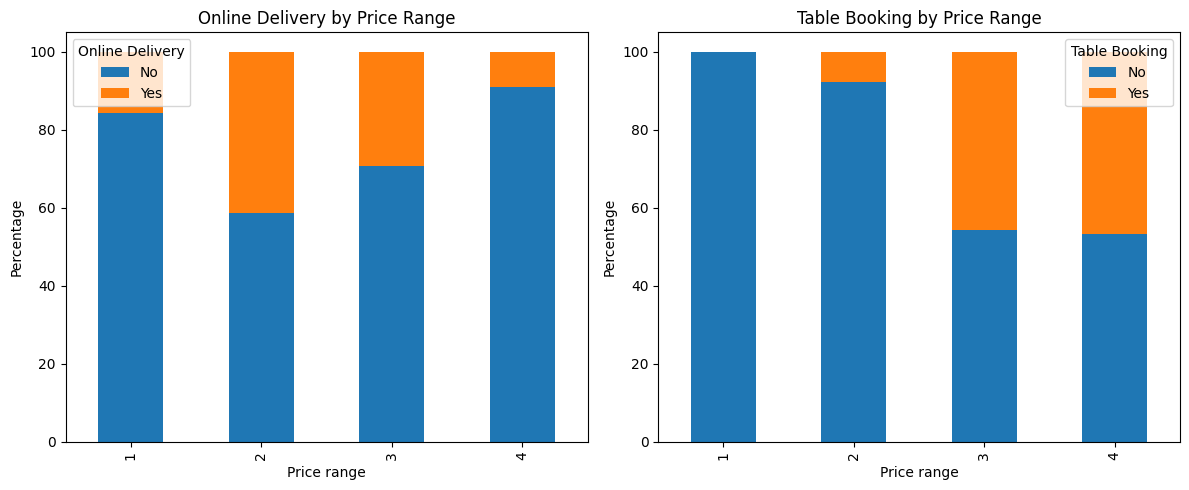

In [76]:

df["Has Online delivery"] = df["Has Online delivery"].str.strip()
df["Has Table booking"] = df["Has Table booking"].str.strip()

online_delivery_pct = pd.crosstab(df["Price range"], df["Has Online delivery"], normalize="index") * 100
table_booking_pct = pd.crosstab(df["Price range"], df["Has Table booking"], normalize="index") * 100

print("Price Range vs Online Delivery (%):")
print(online_delivery_pct)

print("\nPrice Range vs Table Booking (%):")
print(table_booking_pct)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

online_delivery_pct.plot(kind="bar", stacked=True, ax=axes[0])
axes[0].set_title("Online Delivery by Price Range")
axes[0].set_ylabel("Percentage")
axes[0].legend(title="Online Delivery")

table_booking_pct.plot(kind="bar", stacked=True, ax=axes[1])
axes[1].set_title("Table Booking by Price Range")
axes[1].set_ylabel("Percentage")
axes[1].legend(title="Table Booking")

plt.tight_layout()
plt.show()
